In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from keras import backend as K
from keras import optimizers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
def load_data():
    # defining the input image size
    input_image = Input(shape =(28, 28, 1))

    # Loading the data and dividing the data into training and testing sets
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    no_classes = np.unique(Y_train)

    # Cleaning and reshaping the data as required by the model
    X_train = X_train.astype('float32') / 255.
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.astype('float32') / 255.
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

    Y_train = to_categorical(Y_train, no_classes.size)
    Y_test = to_categorical(Y_test, no_classes.size)

    return X_train, Y_train, X_test, Y_test, input_image, no_classes

In [ ]:
def build_network(input_image, no_classes):

    # Building the encoder of the Auto-encoder
    x = Conv2D(16, (3, 3), activation ='relu', padding ='same')(input_image)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Conv2D(8, (3, 3), activation ='relu', padding ='same')(x)
    x = MaxPooling2D((2, 2), padding ='same')(x)
    x = Flatten()(x)
    x = Dense(18, activation = 'relu')(x)
    encoded_layer = Dense(no_classes, activation = 'softmax')(x)

    return encoded_layer

In [ ]:
def build_cnn_model(X_train, Y_train, X_test, Y_test, input_image, encoded_layer):

    # Defining the parameters of the Auto-encoder
    cnn_model = Model(input_image, encoded_layer)
    cnn_model.summary()
    optimizer = optimizers.Adadelta(learning_rate=0.5, rho=0.25, decay=1e-3)
    cnn_model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    # Training the cnn_model
    cnn_model.fit(X_train, Y_train,
                epochs = 15,
                batch_size = 128,
                shuffle = True,
                validation_data =(X_test, Y_test))

    return cnn_model

In [ ]:
X_train, Y_train, X_test, Y_test, input_image, no_classes = load_data()
encoded_layer = build_network(input_image, no_classes.size)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
cnn_model = build_cnn_model(X_train, Y_train, X_val, Y_val, input_image, encoded_layer)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 18)                  │           2,322 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             190 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,416 (17.25 KB)

 Trainable params: 4,416 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - accuracy: 0.2625 - loss: 2.0580 - val_accuracy: 0.6768 - val_loss: 1.0281
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.7183 - loss: 0.8829 - val_accuracy: 0.8174 - val_loss: 0.6023
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.8319 - loss: 0.5609 - val_accuracy: 0.8721 - val_loss: 0.4338
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.8734 - loss: 0.4191 - val_accuracy: 0.8960 - val_loss: 0.3498
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.8987 - loss: 0.3388 - val_accuracy: 0.9110 - val_loss: 0.2978
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.9133 - loss: 0.2919 - val_accuracy: 0.9186 - val_loss: 0.2680
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.9202 - loss: 0.2638 - val_accuracy: 0.9275 - val_loss: 0.2282
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.9282 - loss: 0.2329 - 

In [ ]:
print(cnn_model.evaluate(X_test, Y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9588 - loss: 0.1386
[0.12374825775623322, 0.9610000252723694]


In [ ]:
def visualize_filters(cnn_model):
  outputs = []
  for layer in cnn_model.layers:
    if 'conv' not in layer.name:
      continue
    outputs.append(layer.output)
  viz_model = Model(inputs=cnn_model.inputs, outputs=outputs)
  viz_model.summary()
  return viz_model

def show_filters(viz_model, img):
  img = np.expand_dims(img, 0)
  fmaps = viz_model.predict(img)
  plt.figure()
  plt.imshow(img[0,:,:,0], cmap='gray')
  plt.title('Original Input')
  for fmap in fmaps:
    plt.figure()
    plt.imshow(fmap[0,:,:,0], cmap='gray')

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 8)             │             584 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


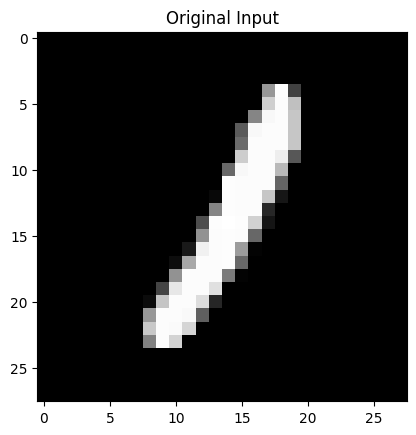

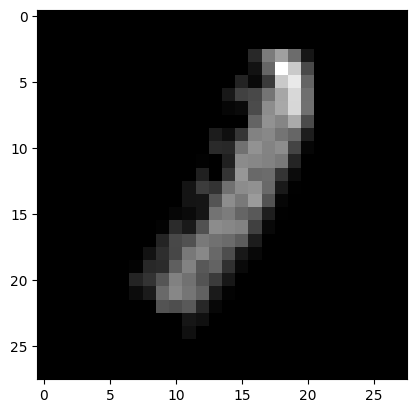

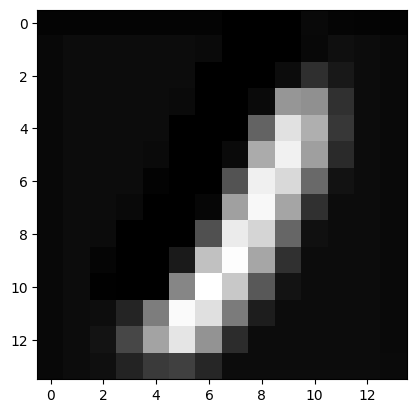

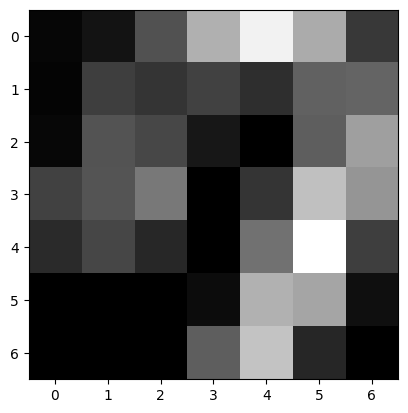

In [ ]:
viz_model=visualize_filters(cnn_model)
idx = randint(0,len(X_test))
show_filters(viz_model, X_test[idx])